1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to graphically display the regions.
* Use `scipy.optimize.minimize()`, trying its optional arguments.

In [229]:
import numpy as np
import pandas as pd
from scipy import fftpack
from matplotlib.colors import LogNorm
from scipy.optimize import basinhopping
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import optimize

%matplotlib inline

Text(0, 0.5, 'y')

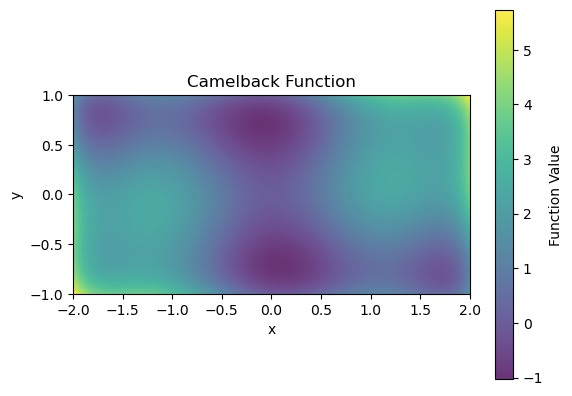

In [186]:
def f(x):
    return (4 - 2.1 * x[0]**2 + x[0]**4/3) * x[0]**2 + x[0]*x[1] + (4 * x[1]**2 - 4) * x[1]**2

x_val = np.linspace(-2, 2, 400)
y_val = np.linspace(-1, 1, 200)
xv, yv = np.meshgrid(x_val, y_val)
sol = f([xv,yv])
#plt.plot(x, f(x, y))

plt.imshow(sol, extent=[-2, 2, -1, 1], origin='lower', cmap='viridis', alpha=0.8)
plt.colorbar(label='Function Value')
plt.title('Camelback Function')
plt.xlabel('x')
plt.ylabel('y')


In [187]:
# Global minimum of function: Using scipy.optimize.minimize
init0 = [0, 0.5]
con = ({'type': 'ineq', 'fun': lambda x: 2 - x[0]}, {'type': 'ineq', 'fun': lambda x: x[0] + 2},
        {'type': 'ineq', 'fun': lambda x: 1 - x[1]}, {'type': 'ineq', 'fun': lambda x: x[1] + 1})

result0 = optimize.minimize(f, init0, constraints = con)
print(result0)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.0316284523624513
       x: [-8.984e-02  7.126e-01]
     nit: 6
     jac: [ 1.605e-05 -1.878e-04]
    nfev: 20
    njev: 6


In [189]:
# Global minimum of function: Using basinhopping
init = [0, 0.5]
result = basinhopping(f, init, niter=200, stepsize = 0.5)
print("Global minimum: (x,y) = (%.4f, %.4f), f(x,y) = %.4f" % (result.x[0], result.x[1], result.fun))

Global minimum: (x,y) = (-0.0898, 0.7127), f(x,y) = -1.0316


In [191]:
# Number of global minima and function values
init2 = [0, -0.5]
con = ({'type': 'ineq', 'fun': lambda x: 2 - x[0]}, {'type': 'ineq', 'fun': lambda x: x[0] + 2},
        {'type': 'ineq', 'fun': lambda x: 1 - x[1]}, {'type': 'ineq', 'fun': lambda x: x[1] + 1})

result2 = optimize.minimize(f, init2, constraints = con)
print(result2)
print()

init3 = [-2, 1]
con = ({'type': 'ineq', 'fun': lambda x: 2 - x[0]}, {'type': 'ineq', 'fun': lambda x: x[0] + 2},
        {'type': 'ineq', 'fun': lambda x: 1 - x[1]}, {'type': 'ineq', 'fun': lambda x: x[1] + 1})

result3 = optimize.minimize(f, init3, constraints = con)
print(result3)
print()

init4 = [2, -1]
con = ({'type': 'ineq', 'fun': lambda x: 2 - x[0]}, {'type': 'ineq', 'fun': lambda x: x[0] + 2},
        {'type': 'ineq', 'fun': lambda x: 1 - x[1]}, {'type': 'ineq', 'fun': lambda x: x[1] + 1})

result4 = optimize.minimize(f, init4, constraints = con)
print(result4)
print()
print("In total we see 4 global minima.")
print("The function value for (x,y) = (-0.0898, 0.7127) and (x,y) = (0.0898, -0.7127) is f(x,y) = -1.0316 for both minima")
print("The function value for (x,y) = (-1.703, 0.7961) and (x,y) = (1.703, -0.7961) is f(x,y) = -0.2155 for both minima")

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.0316284523650276
       x: [ 8.984e-02 -7.126e-01]
     nit: 6
     jac: [-1.605e-05  1.878e-04]
    nfev: 20
    njev: 6

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.21546365068364626
       x: [-1.703e+00  7.961e-01]
     nit: 7
     jac: [ 2.534e-03  6.281e-04]
    nfev: 27
    njev: 7

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.21546365066401263
       x: [ 1.703e+00 -7.961e-01]
     nit: 7
     jac: [-2.534e-03 -6.281e-04]
    nfev: 27
    njev: 7

In total we see 4 global minima.
The function value for (x,y) = (-0.0898, 0.7127) and (x,y) = (0.0898, -0.7127) is f(x,y) = -1.0316 for both minima
The function value for (x,y) = (-1.703, 0.7961) and (x,y) = (1.703, -0.7961) is f(x,y) = -0.2155 for both minima


In [194]:
# Initial guess (0,0)
init5 = [0,0]
result5 = optimize.minimize(f, init5, constraints = con)
print(result5)
print()
print("When the initial guess is (x,y) = (0,0) the algorithm returns the point (0,0) as a global minima with \nfunction value f(0,0) = 0")

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0
       x: [ 0.000e+00  0.000e+00]
     nit: 1
     jac: [ 5.960e-08 -5.960e-08]
    nfev: 3
    njev: 1

When the initial guess is (x,y) = (0,0) the algorithm returns the point (0,0) as a global minima with 
function value f(0,0) = 0


2\. **Non-linear ODE: the damped pendulum**

The equation of the motion of a forced pendulum, as a function of the angle $\theta$ with the vertical, is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \frac{g}{l}\sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs by defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \frac{g}{l}\sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $l = 10$, $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

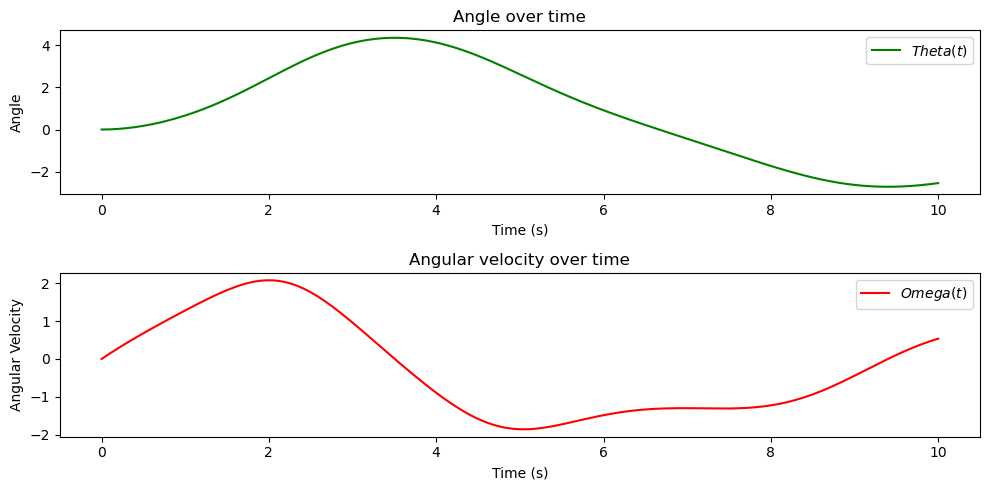

In [208]:
# set the constants
l = 10
Q = 2.0
d = 1.5
Omega = 0.65

def derivative(X, time, l, Q, d, Omega):
    return(X[1], -1/Q * X[1] + 9.807/l*np.sin(X[0]) + d * np.cos(Omega * time))

t = np.linspace(0, 10, 200)
Xinit = (0, 0)
solution = odeint(derivative, Xinit, t, args=(l, Q, d, Omega))

# Plot theta as a function of time
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(t, solution[:, 0], label=r'$Theta(t)$', color = 'green')
plt.title('Angle over time')
plt.xlabel('Time (s)')
plt.ylabel('Angle')
plt.legend()

# Plot omega as a function of time
plt.subplot(2, 1, 2)
plt.plot(t, solution[:, 1], label=r'$Omega(t)$', color='red')
plt.title('Angular velocity over time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity')
plt.legend()

plt.tight_layout()
plt.show()

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one downloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [210]:
!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

--2023-12-17 17:33:46--  https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ebe1cnyd2gm836a/populations.txt [following]
--2023-12-17 17:33:47--  https://www.dropbox.com/s/raw/ebe1cnyd2gm836a/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce4c5d326e38d279268b831b04c.dl.dropboxusercontent.com/cd/0/inline/CJkn5n1_dz024FdzPlxr7ZTfJQO6R0T7qMzZuvn3jQzy6N_2bmhR8zXKS61XvmxXICJAH6rJkaHU1kmmvXqaBSUZUbVZRjQwyJKYrfg-OG9tjaZQhC273U2QN5H3cGhS97M/file# [following]
--2023-12-17 17:33:47--  https://uce4c5d326e38d279268b831b04c.dl.dropboxusercontent.com/cd/0/inline/CJkn5n1_dz024FdzPlxr7ZTfJQO6R0T7qMzZuvn3jQzy6N_2bmhR8zXKS61XvmxXICJAH6rJkaHU1kmmvXqaBSUZUbVZRjQwyJKYrfg-OG9tjaZQhC273U2QN5H3cGhS97M/file
Res

In [221]:
df0 = pd.read_csv('./data/populations.txt', sep = "\t")
df0

,# year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600
5,1905,20600.0,41700.0,39800
6,1906,18100.0,19000.0,38600
7,1907,21400.0,13000.0,42300
8,1908,22000.0,8300.0,44500
9,1909,25400.0,9100.0,42100


In [222]:
year = df0['# year'].to_numpy()
lynx = df0['lynx'].to_numpy()

lynx_fft = fftpack.fft(lynx)

#power = np.abs(lynx_fft) ** 2 # these are the "weights" of the Fourier components for each discrete frequency interval

lynx_fft_freq = fftpack.fftfreq(len(lynx), d=1)

# consider only the real part of the signal (positive frequencies)
i = lynx_fft_freq > 0

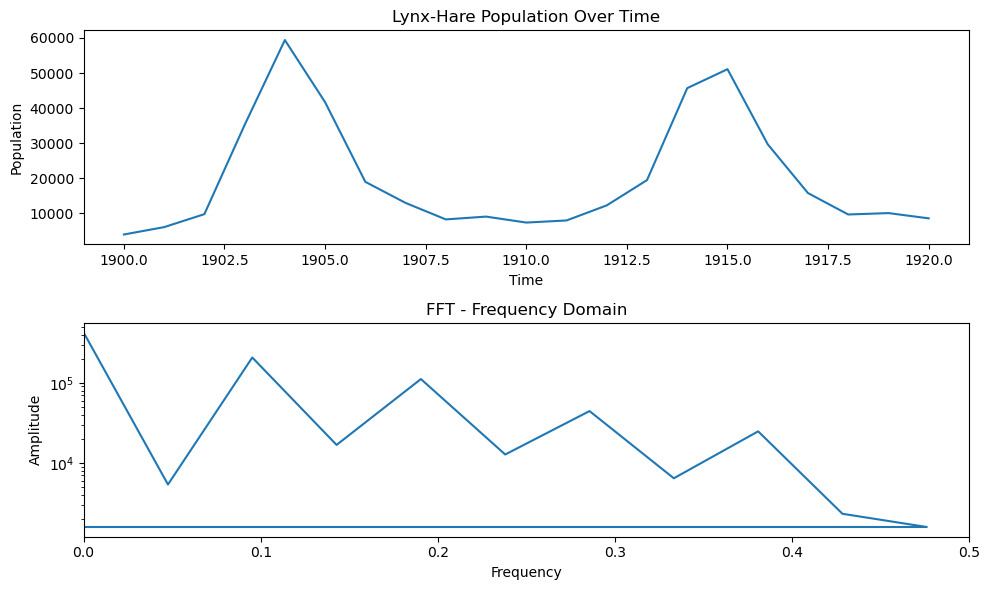

In [226]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(year, lynx)
plt.title('Lynx-Hare Population Over Time')
plt.xlabel('Time')
plt.ylabel('Population')

plt.subplot(2, 1, 2)
plt.plot(lynx_fft_freq, np.abs(lynx_fft))
plt.title('FFT - Frequency Domain')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.yscale('log')
plt.xlim(0, 0.5)  # Show only positive frequencies

plt.tight_layout()
plt.show()

In [ ]:
# Plot fra forelæsning
plt.figure(figsize=(8, 6))
plt.plot(fftfreq[i], temp_psd[i])
#plt.ylim(0, 5)
plt.xlabel('Frequency (1/year)')
plt.ylabel('Power')
plt.yscale('log')

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.55, 0.3, 0.3])
plt.plot(fftfreq[:40], temp_psd[:40])
plt.setp(axes, yticks=[])
plt.yscale('log')

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the 2D regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

<function matplotlib.pyplot.show(close=None, block=None)>

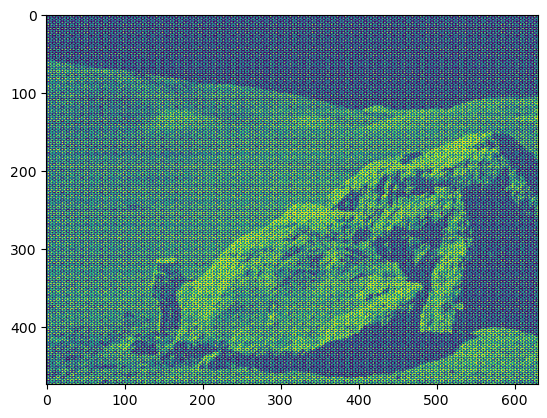

In [296]:
img = plt.imread("images/moonlanding.png")
#img = plt.imread("images/moonlanding.png").astype(float)

plt.imshow(img)
#plt.imshow(img, cmap = 'gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

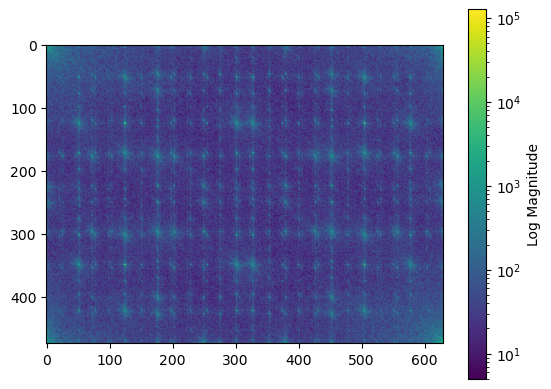

In [297]:
img_fft = fftpack.fft2(img)

plt.imshow(np.abs(img_fft), norm = LogNorm(vmin = 5))
#plt.imshow(np.abs(img_fft), cmap='gray', norm = LogNorm(vmin = 5))
plt.colorbar(label='Log Magnitude')
plt.show

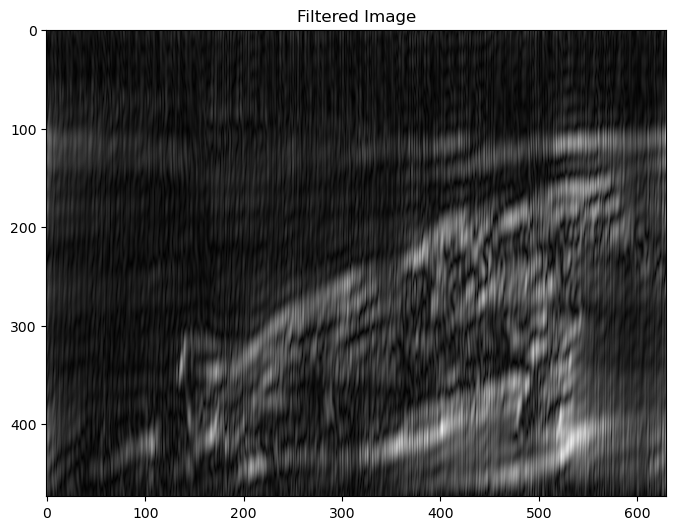

In [298]:
noise_threshold_x = 175
noise_threshold_y = 300

img_fft[:noise_threshold_x, :] = 0
#img_fft[-noise_threshold_x:, :] = 0
img_fft[:, :noise_threshold_y] = 0
#img_fft[:, -noise_threshold_y:] = 0

noise_threshold_x2 = 450
noise_threshold_y2 = 175

img_fft[:noise_threshold_x2, :] = 0
img_fft[:, :noise_threshold_y2] = 0

noise_threshold_x3 = 300
noise_threshold_y3 = 350

img_fft[:noise_threshold_x3, :] = 0
img_fft[:, :noise_threshold_y3] = 0

noise_threshold_x4 = 110
noise_threshold_y4 = 50

img_fft[:noise_threshold_x4, :] = 0
img_fft[:, :noise_threshold_y4] = 0

#noise_threshold_x5 = 600
#noise_threshold_y5 = 0

#img_fft[:noise_threshold_x5, :] = 0
#img_fft[:, :noise_threshold_y5] = 0


filtered_image = np.abs(fftpack.ifft2(img_fft))

plt.figure(figsize=(8, 8))
plt.title('Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.show()